#### Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file ='test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_test shape:", y_valid.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)
y_test shape: (4410,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = X_train.shape[0]
#n_train =  len(X_train)

# Number of validation examples
n_valid = X_valid.shape[0]
#n_test = len(X_test)


# Number of testing examples.
n_test = X_test.shape[0]
#image_shape =X_train[0].shape

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
#alltotal = set(Y_train )
#n_classes = len(alltotal )


#image_shape =X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### IMPORT all needen libraries

import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import csv
import cv2
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from skimage.color import rgb2gray

#video hint-keep in mind:how many images are in each class??- look at training and testing data to see how many signs are in each class

### Visualize Data

View a sample of dataset. Select a random image from the training set and visualize.

{27397: 'Priority road'}
12


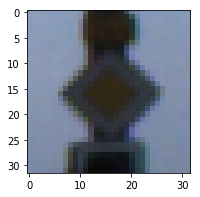

In [44]:
#### Data exploration visualization code goes here.
index=random.randint(0, len(X_train))
image=X_train[index]#.squeeze()

classId2SignName = {}

with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        classId2SignName[row[0]] = row[1]
       

name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',') 

figures = {} #4D array: (num example, with, height, channels)
labels = {}  #2D array. (lable, class)

labels[index] = name_values[y_train[index]][1].decode('ascii')
figures[index] = X_train[index]
    
plt.figure(figsize=(3,3))
plt.imshow(image)

print(labels)
print(y_train[index])

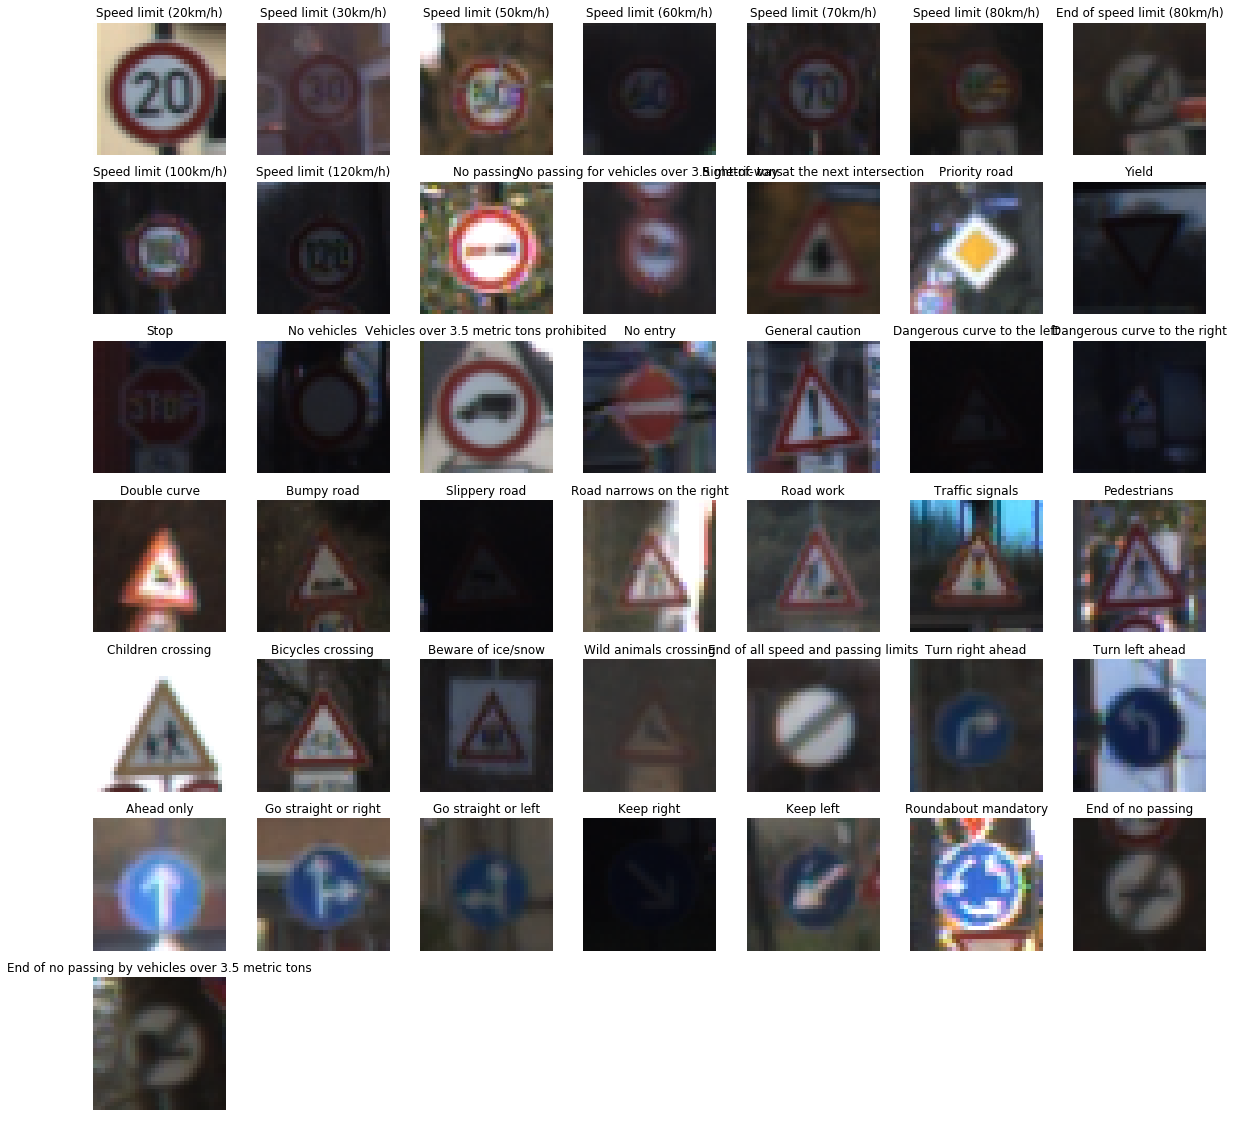

In [50]:
classes_count = []
label_name = []

fig = plt.figure(figsize=(20, 20))
labels, indices = np.unique(y_train, return_index=True)

with open( './signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    label_name = list(reader)
            
    for i, range in enumerate(indices):
        fig.add_subplot(7, 7, i+1)
        plt.axis('off')
        plt.title(label_name[y_train[range]+1][1])
        plt.imshow(X_train[range])
f.close()
plt.show()


#### histogram of label frequency

ind = np.arange(n_classes)
n, bins, patches = ax.hist(y_train, n_classes)

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

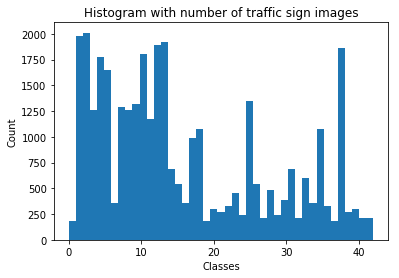

In [5]:
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, n_classes)
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Histogram with number of traffic sign images')

plt.show()

In [6]:
counter = Counter(y_train)

print("Many signs:")
for i in counter.most_common(5):
    print("'{}'".format(name_values[i[0]][1]),' train samples: {}'.format(i[1]))
print()

print("Fewer signs:")
for i in sorted(counter.items(),key=lambda x: x[1])[:5]:
    print("'{}'".format(name_values[i[0]][1]),' train samples: {}'.format(i[1]))


Many signs:
'b'Speed limit (50km/h)''  train samples: 2010
'b'Speed limit (30km/h)''  train samples: 1980
'b'Yield''  train samples: 1920
'b'Priority road''  train samples: 1890
'b'Keep right''  train samples: 1860

Fewer signs:
'b'Go straight or left''  train samples: 180
'b'Dangerous curve to the left''  train samples: 180
'b'Speed limit (20km/h)''  train samples: 180
'b'End of no passing''  train samples: 210
'b'End of no passing by vehicles over 3.5 metric tons''  train samples: 210


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Pre-process image: 
                    - rotate images
                    - normalize images from: 0,255 to: 0,1
                    - grayscale image

In [8]:
from numpy import newaxis
from sklearn.utils import shuffle

import tensorflow as tf

def normalize(img):
    return cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
 
def grayscale(img):
   # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
 #  return tf.image.rgb_to_grayscale(img, name=None)
   return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#print(len(image))


# run all imges 
def functions(images):
    print(images.shape)
    result = np.zeros(shape=(n_train,32,32))
    for i in range(n_train): 
        gray_img = grayscale(images[i])
        img_normalized = normalize(gray_img)
        result[i] = gray_img
    print(result.shape)
    return result
X_traingray = functions(X_train)
print()


def functions(images):
    print(images.shape)
    result = np.zeros(shape=(n_test,32,32))
    for i in range(n_test): 
        gray_img = grayscale(images[i])
        img_normalized = normalize(gray_img)
        result[i] = gray_img
    print(result.shape)
    return result
X_testgray = functions(X_test)

print()
def functions(images):
    print(images.shape)
    result = np.zeros(shape=(n_valid,32,32))
    for i in range(n_valid): 
        gray_img = grayscale(images[i])
        img_normalized = normalize(gray_img)
        result[i] = gray_img
    print(result.shape)
    return result
X_validgray = functions(X_valid)
print()

#print the shape of the created images
print("Training set Image data shape =", X_traingray.shape)
print("Validating set Image data shape =", X_validgray.shape)
print("Testing set Image data shape =", X_testgray.shape)
print()
print('All figures are in normalized gray-scale.')


(34799, 32, 32, 3)
(34799, 32, 32)

(12630, 32, 32, 3)
(12630, 32, 32)

(4410, 32, 32, 3)
(4410, 32, 32)

Training set Image data shape = (34799, 32, 32)
Validating set Image data shape = (4410, 32, 32)
Testing set Image data shape = (12630, 32, 32)

All figures are in normalized gray-scale.


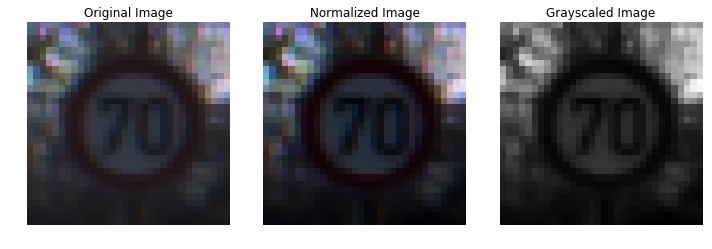

In [9]:
index = random.randint(0, len(X_traingray))
#img = X_train[2190]
img =X_train[index]

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


#image = X_train[index]
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(normalize(image))
plt.title('Normalized Image')
plt.axis('off')

#index = random.randint(0, len(X_traingray))
#image = X_traingray[index]
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(grayscale(image) ,cmap='gray')
plt.title('Grayscaled Image')
plt.tight_layout()

In [10]:
#Definition architecture
X_traingray, X_validationgray, y_train, y_validation = train_test_split(X_traingray, y_train, test_size=0.2, random_state=0)
X_traingray, y_train = shuffle(X_traingray, y_train)

print("train size:", X_traingray.shape)
print("validation size:",X_validationgray.shape)
print("train size:",y_train.shape)
print("validation size:",y_validation.shape)


from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 64

train size: (27839, 32, 32)
validation size: (6960, 32, 32)
train size: (27839,)
validation size: (6960,)


### Model Architecture

In [11]:
# Most important area. localize sign... use tensorflow.
# Solution LeNetLab starter code. Try what is doing to start out with the model architecture
# adjust model where needed
# train model on training data

def LeNet(x):
        #Hyperparameters- initialize weights
        mu    = 0
        sigma = 0.08
        
        # Reshape input picture
        x = tf.reshape(x, shape=[-1, 32, 32, 1]) ##
        
        #Solution Layer 1: Convolutional layer. Input = 32x32x3 Output= 28x28x6  shape=(5,5,3,3)
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))  #bias
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')+conv1_b                            
                              #(32-5+2)1=28: ((W-F)+2P)/S- Stride and Padding=1
 
        #SOLUTION Activate 1
        conv1   = tf.nn.relu(conv1)
                              
        #SOLUTION: Pooling layer1 . Input = 28x28x6, Output=14x14x6
        conv1   = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
        print("Max Pooling", conv1.shape)  
        
        #Solution Layer 2: Convolutional layer. Input = 10x10x16                           
        conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16)) #bias
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv2_b     
        print("Convolutional layer",conv2.shape)  
        
        #SOLUTION Activate 2
        conv2   = tf.nn.relu(conv2)
              
        
        #SOLUTION: Pooling layer 2. Input = 10x10x16, Output=5x5x16 wirklichkeit ?,7,7,6
        conv2   = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
        print("Max Pooling", conv2.shape)
        
        #SOLUTION: Flatten layer 3D to 1D: into a vector. Input= 5x5x16, Output=400
        fc0     = flatten(conv2) #tf.contrib.layers.flatten
        print("Flatten", fc0.shape)
               
        #Solution Layer 3: Convolutional. Input = 400 output120
        fc1_W   = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
        fc1_b   = tf.Variable(tf.zeros(120)) #bias
        fc1     = tf.matmul(fc0, fc1_W) + fc1_b         
        print("Layer 3", fc1.shape)
        
        #SOLUTION Activate 3
        fc1     = tf.nn.relu(fc1) 
      #  dr1     = tf.nn.dropout(fc1, keep_prob) 
      #  print(dr1.shape)
        
        #Solution Layer 4: Convolutional. Input = 120 output=84
        fc2_W   = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
        fc2_b   = tf.Variable(tf.zeros(84)) #bias
        fc2     = tf.matmul(fc1, fc2_W) + fc2_b
        print("Layer 4", fc2.shape) 
        
        #SOLUTION Activate 4
        fc2     = tf.nn.relu(fc2)  
   #     dr2     = tf.nn.dropout(fc2, keep_prob) 
                          
        #Solution Layer 5: Convolutional. Input = 84 output=10
        fc3_W  = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43)) #bias
        logits = tf.matmul(fc2, fc3_W)+ fc3_b   
        print(logits)  
        
        return logits

### Training Pipeline
Training pipeline that uses the model to classify MNIST data

In [12]:
# input and output of the pipeline
x = tf.placeholder(tf.float32,(None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
one_hot_y = tf.one_hot(y,43)

rate      = 0.001 #default value can test different one 0.0001
logits    = LeNet(x)

Max Pooling (?, 14, 14, 6)
Convolutional layer (?, 10, 10, 16)
Max Pooling (?, 5, 5, 16)
Flatten (?, 400)
Layer 3 (?, 120)
Layer 4 (?, 84)
Tensor("add_4:0", shape=(?, 43), dtype=float32)


In [13]:
cross_entropy  = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer      = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train, Validate and Test the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
 with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_traingray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_traingray, y_train = shuffle(X_traingray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_traingray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
            
        validation_accuracy = evaluate(X_validationgray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        training_accuracy = evaluate(X_traingray, y_train)
        print("Training Accuracy = {:.3f}".format(training_accuracy))        
        print()
       
    saver.save(sess, './lenet')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy       = evaluate(X_testgray, y_test)
    print("Test Accuracy     = {:.3f}".format(test_accuracy))
    
    training_accuracy   = evaluate(X_traingray, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    
#    validation_accuracy = evaluate(evaluate(X_validationgray, y_validation)
#    print("Training Accuracy = {:.3f}".format(validation_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.900
Training Accuracy = 0.917

EPOCH 2 ...
Validation Accuracy = 0.938
Training Accuracy = 0.953

EPOCH 3 ...
Validation Accuracy = 0.954
Training Accuracy = 0.970

EPOCH 4 ...
Validation Accuracy = 0.954
Training Accuracy = 0.968

EPOCH 5 ...
Validation Accuracy = 0.971
Training Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.961
Training Accuracy = 0.975

EPOCH 7 ...
Validation Accuracy = 0.970
Training Accuracy = 0.984

EPOCH 8 ...
Validation Accuracy = 0.974
Training Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.966
Training Accuracy = 0.982

EPOCH 10 ...
Validation Accuracy = 0.972
Training Accuracy = 0.987

EPOCH 11 ...
Validation Accuracy = 0.975
Training Accuracy = 0.991

EPOCH 12 ...
Validation Accuracy = 0.981
Training Accuracy = 0.996

EPOCH 13 ...
Validation Accuracy = 0.976
Training Accuracy = 0.990

EPOCH 14 ...
Validation Accuracy = 0.972
Training Accuracy = 0.989

EPOCH 15 ...
Validation Accuracy = 0.981
Tra

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

./test_images/Sign1.jpg
(530, 530)
(32, 32)
./test_images/Sign2.jpg
(600, 600)
(32, 32)
./test_images/Sign3.jpg
(300, 300)
(32, 32)
./test_images/Sign4.jpg
(355, 400)
(32, 32)
./test_images/Sign5.jpg
(500, 332)
(32, 32)


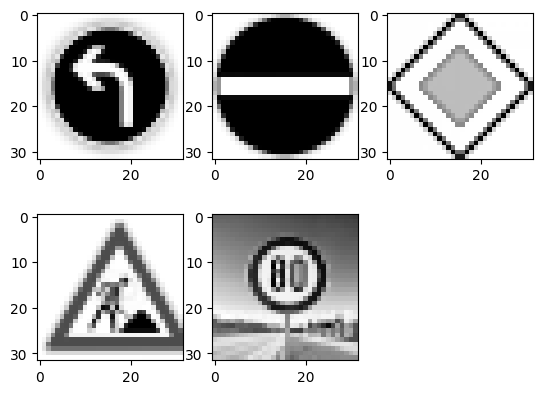

In [16]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.rcdefaults()

import tensorflow as tf
import numpy as np
import os
import cv2

ImagesInFolder='./test_images/Sign'


def loadImage(path):
    print(path)
    image = mpimg.imread(path)
    image = grayscale(image)
    image = normalize(image)
    print(image.shape)
    minimun = np.minimum(image.shape[0], image.shape[1])
    cropped = image[0:minimun, 0:minimun]
    image = cv2.resize(cropped, (32,32), interpolation = cv2.INTER_AREA)
    return image

# Load an color image in grayscale
def loadImages(num):
    result = []
    f = plt.figure()
    for i in range(1,num+1):
        image = loadImage(ImagesInFolder + str(i) + '.jpg')
        f.add_subplot(2, 3, i) 
        plt.imshow(image,cmap="Greys_r")  
        result.append(image)
        print(image.shape)
    return result
    
X_data = np.array(loadImages(5))
y_labels = np.array([20,22,10,11,14]) #random numbers as placeholders

### Analyze Performance

In [27]:
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
 #   result = sess.run(top_k, feed_dict={x: X_data, keep_prob: .1})
    result = sess.run(top_k, feed_dict={x: X_data, keep_prob: .1})
   # webaccuracy = evaluate(top_k, y_labels)
    webaccuracy = evaluate(X_data, y_labels)

    predicted_logits = sess.run(logits, feed_dict={x: X_data, keep_prob:1})
    predicted_labels = np.argmax(predicted_logits, axis=1)
   
    predicted_labels= result.indices
    predictions  = result.values

INFO:tensorflow:Restoring parameters from ./lenet


In [36]:
print(predictions)
print(predicted_logits)
print(predicted_labels)

[[ 0.25171095  0.14992896  0.13162129  0.07647797  0.04171905]
 [ 0.18763044  0.14602502  0.09107718  0.05687568  0.05606761]
 [ 0.1887731   0.13648809  0.10283011  0.08171178  0.07049391]
 [ 0.17399028  0.16660206  0.08070541  0.07794241  0.06604666]
 [ 0.30445772  0.11210814  0.0985722   0.09468351  0.07766312]]
[[-4.18374014 -1.55591404 -0.90670228  1.23340297 -1.53206682  1.75152278
  -1.42749679  0.5602442   1.10317016 -0.37369519 -0.61336756 -1.26701176
  -0.60047615 -0.18528342 -1.75623298 -0.93476117 -1.66350889 -3.08499289
  -1.47607064 -2.4916079  -0.95098209 -2.47816491 -2.87978196 -1.98546743
  -4.1033411  -2.57210612 -2.39178991 -4.48514366 -2.84288573 -2.34109139
  -2.10733628 -2.11578226 -0.53904557 -1.89109623 -1.43217242 -2.46491456
  -1.94067955 -4.13548136 -0.04580079 -2.59436989 -2.26934671 -2.18111372
  -2.06225657]
 [-3.98204565 -1.4636941  -0.43006897  0.59214628 -0.7796787   1.31491327
  -1.24381244  0.12130691  1.06421697  0.10699727 -0.166124   -1.82267654
  -

In [37]:
with open( './signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    label_name = list(reader)           

for i, image in enumerate(X_data):
    print()
    print("Sign", i + 1)
    for j in range(5):
        print(label_name[predicted_labels[i][j] + 1], "\t\ - Prediction:", predictions[i][j])
        


Sign 1
['5', 'Speed limit (80km/h)'] 	\ - Prediction: 0.251711
['3', 'Speed limit (60km/h)'] 	\ - Prediction: 0.149929
['8', 'Speed limit (120km/h)'] 	\ - Prediction: 0.131621
['7', 'Speed limit (100km/h)'] 	\ - Prediction: 0.076478
['38', 'Keep right'] 	\ - Prediction: 0.041719

Sign 2
['5', 'Speed limit (80km/h)'] 	\ - Prediction: 0.18763
['8', 'Speed limit (120km/h)'] 	\ - Prediction: 0.146025
['3', 'Speed limit (60km/h)'] 	\ - Prediction: 0.0910772
['7', 'Speed limit (100km/h)'] 	\ - Prediction: 0.0568757
['9', 'No passing'] 	\ - Prediction: 0.0560676

Sign 3
['5', 'Speed limit (80km/h)'] 	\ - Prediction: 0.188773
['8', 'Speed limit (120km/h)'] 	\ - Prediction: 0.136488
['7', 'Speed limit (100km/h)'] 	\ - Prediction: 0.10283
['10', 'No passing for vehicles over 3.5 metric tons'] 	\ - Prediction: 0.0817118
['3', 'Speed limit (60km/h)'] 	\ - Prediction: 0.0704939

Sign 4
['3', 'Speed limit (60km/h)'] 	\ - Prediction: 0.17399
['5', 'Speed limit (80km/h)'] 	\ - Prediction: 0.166602
['

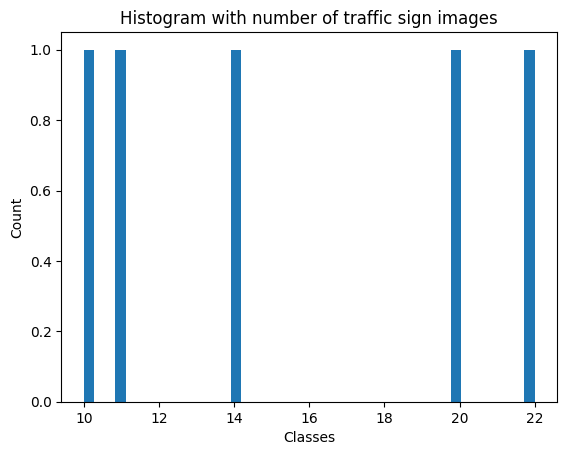

'b'Dangerous curve to the right''  train samples: 1
'b'Bumpy road''  train samples: 1
'b'No passing for vehicles over 3.5 metric tons''  train samples: 1
'b'Right-of-way at the next intersection''  train samples: 1
'b'Stop''  train samples: 1



In [38]:
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_labels, n_classes)
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Histogram with number of traffic sign images')

plt.show()
counter = Counter(y_labels)
for i in sorted(counter.items(),key=lambda x: x[1])[:5]:
    print("'{}'".format(name_values[i[0]][1]),' train samples: {}'.format(i[1]))

print()

### Predict the Sign Type for Each Image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 
